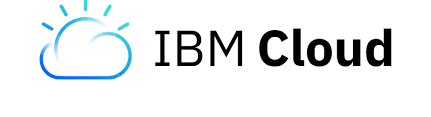

# TUTORIAL - Kubernetes

## Before you begin ensure that you have installed kubectl and Minikube

* [Install and setup kubectl](https://kubernetes.io/docs/tasks/tools/install-kubectl)
* [Install Minikube](https://kubernetes.io/docs/tasks/tools/install-minikube/)

## PART 1: Using Minikube to Create a Cluster

If everything is setup correctly you can simply type the following to create a cluster.

```bash
~$ minikube start
```

### It will take a few minutes to create the cluster.

When it is done, you should see: 

`🏄  Done! kubectl is now configured to use "minikube"`

### You can verify the status of the cluster with: 

```bash
~$ minikube status
```

You should see that the host, kubelet and apiserver are running

### For an interactive view of your cluster in your web browser try:

```bash
~$ minikube dashboard &
```

### To interact with your cluster, you will use kubectl. 
First check that it is properly installed:
```bash
~$ kubectl version
```
You should see version information for both the client and the server

To see basic information about the cluster use:

```bash
~$ kubectl cluster-info
```

And to see the nodes, use:

```bash
~$ kubectl get nodes
```

You should see your minikube cluster with status = 'Ready'

## Creating a Kubernetes Deployment

We have created and verified a cluster of nodes (in this case, only one node on a local minikube cluster). This node is a worker, but so far, it doesn't have anything to do.

To run our application on it, we need to give it a Kubernetes Deployment. The Deployment instructs kubernetes on how to create and manage instances of the application. Instead of loading the application onto the node directly, we give it to the kubernetes *master*. The master then schedules the deployment onto the available nodes and manages them on an on-going basis. The master monitors the nodes; if a node goes down, the master will replace the node with another node in the cluster.



Review the available docker images on your machine:
```bash
~$ docker images
```

You should see the example-ml-app image we created earlier in this course.

We will create a deployment using a simple "Hello World" example from google container registry

```bash
~$ kubectl create deployment hello-node --image=gcr.io/hello-minikube-zero-install/hello-node
```

This should take about two minutes to set up. When ready, view this deployment with:

```bash
~$ kubectl get deployments
```

You can see additional information about the status of this deployment using:

```bash
~$ kubectl describe deployment hello-node
```

## Expose a port for external communication
In order to communicte with the world outside of the cluster, we need to expose a port with the following command:

```bash
~$ kubectl expose deployment hello-node --type=LoadBalancer --port=8080
```

We then need to activate this service on minikube using
```bash
~$ minikube service hello-node
```

When you activate the hello-node service, you should see the URL of the cluster server in the terminal window and it will open a web browser pointing to the cluster which is serving the "Hello World!" web page.

Congratulations! You have sucessfully deployed a service to a kubernetes cluster!

## Next Steps

There's a great deal more that kubernetes can do.... much too much to cover here.

IBM provides excellent, in-depth introductions and tutorials:

[IBM: What is Kubernetes?](https://www.ibm.com/cloud/learn/kubernetes)

[IBM: Kubernetes 101](https://www.ibm.com/cloud/garage/content/course/kubernetes-101)